In [1]:
# from tensorflow.keras.models import load_model
# model = load_model('model1.h5')

In [1]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

In [2]:
# with tf.device('/device:GPU:0'):
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(230, 230, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7),)(headModel)
headModel = Flatten(name="flatten")(headModel)

headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)

headModel = Dense(1, activation="sigmoid")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [3]:
model.load_weights('./weights/model1_weights.h5')

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 230, 230, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 236, 236, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 115, 115, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 115, 115, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [5]:
import cv2

In [6]:
img1 = cv2.imread('testFrame1.jpg')
img2 = cv2.imread('testFrame2.jpg')

In [7]:
import matplotlib.pyplot as plt

(240, 320, 3)


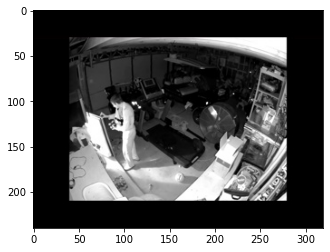

In [8]:
print(img1.shape)
plt.imshow(img1);

(240, 320, 3)


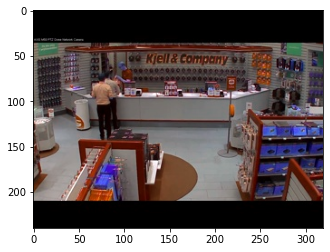

In [9]:
print(img2.shape)
plt.imshow(img2);

In [10]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (230, 230)).astype("float32")

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (230, 230)).astype("float32")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(230, 230, 3)


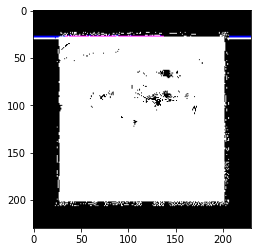

In [11]:
print(img1.shape)
plt.imshow(img1);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(230, 230, 3)


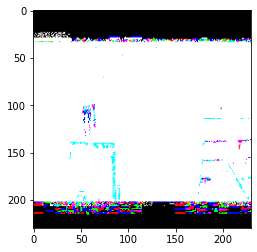

In [12]:
print(img2.shape)
plt.imshow(img2);

In [13]:
import numpy as np

In [14]:
prediction1 = model.predict(np.expand_dims(img1, axis=0))
prediction1

array([[0.6499428]], dtype=float32)

In [15]:
prediction2 = model.predict(np.expand_dims(img2, axis=0))
prediction2

array([[0.8064543]], dtype=float32)

In [16]:
prediction2[0][0]

0.8064543

In [17]:
Q = []

# [(0.79, 0.80), (0.76), (0.61)]
thresh = 0.79

# crime[006, 012, 014]
cap = cv2.VideoCapture('./dataset/test/Burglary085_x264.mp4')

if cap.isOpened()==False:
    print("Either file not found or wrong codec used")

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret==True:
        out = frame.copy()
        out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
        out = cv2.resize(out, (230, 230)).astype("float32")
        
        pred = model.predict(np.expand_dims(out, axis=0))[0][0]
        
        Q.append(pred)
        if np.array(Q).mean()>thresh:
#         if pred>thresh:
            state = "crime"
        else:
            state = "normal"
        
        frame = cv2.putText(frame, state, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (200, 200, 200), 2)
        
        # feedback
        cv2.imshow('frame',frame)
        print(f'Average prediction:{np.array(Q).mean()*100}%, state={state}')
    
        # if you want to quit, press 'q'
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    
    # if nothing is returned, break out of the loop
    else:
        break

cap.release()
cv2.destroyAllWindows()

Average prediction:79.7855019569397%, state=crime
Average prediction:79.71279621124268%, state=crime
Average prediction:80.09883761405945%, state=crime
Average prediction:80.26082515716553%, state=crime
Average prediction:80.368173122406%, state=crime
Average prediction:80.50383925437927%, state=crime
Average prediction:80.59020042419434%, state=crime
Average prediction:80.65967559814453%, state=crime
Average prediction:80.65010905265808%, state=crime
Average prediction:80.61859011650085%, state=crime
Average prediction:80.61859011650085%, state=crime
Average prediction:80.58443069458008%, state=crime
Average prediction:80.56126832962036%, state=crime
Average prediction:80.66039681434631%, state=crime
Average prediction:80.78691959381104%, state=crime
Average prediction:80.8743953704834%, state=crime
Average prediction:80.9477686882019%, state=crime
Average prediction:80.97270727157593%, state=crime
Average prediction:80.92750310897827%, state=crime
Average prediction:80.87746500968933